# Importing some libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 


In [2]:
titanic = pd.read_csv("titanic/train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
              ..
B39            1
A16            1
C7             1
E34            1
B94            1
Name: Cabin, Length: 147, dtype: int64

In [5]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
pd.value_counts(titanic['Pclass'])

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

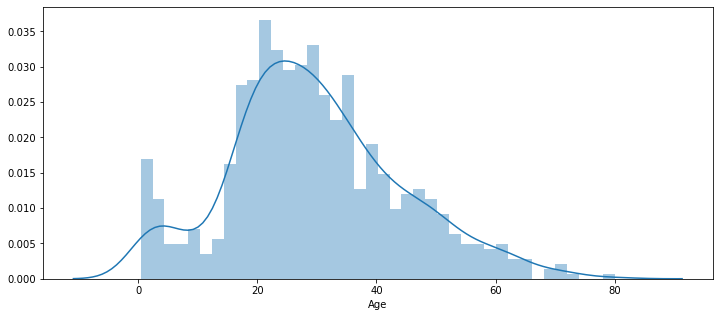

In [10]:
plt.figure(figsize = (12,5))
sns.distplot(titanic['Age'], bins = 40);

In [11]:
titanic_missingAge = titanic[titanic['Age'].isnull()]

In [12]:
titanic_missingAge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
titanic_missingAge['Fare'].isnull().sum()

0

male      124
female     53
Name: Sex, dtype: int64

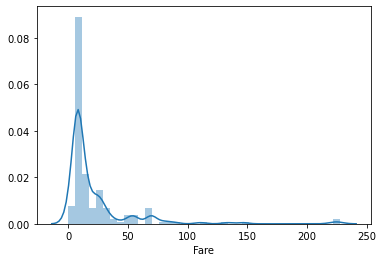

In [14]:
sns.distplot(titanic_missingAge['Fare']);

titanic_missingAge['Pclass'].value_counts()

titanic_missingAge['Embarked'].value_counts()

titanic_missingAge['Sex'].value_counts()

In [15]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
titanic.groupby('Sex').mean() #survival given Sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [17]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [18]:
titanic.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [19]:
titanic['Age_1'] = np.where(titanic['Age'] <= np.mean(titanic["Age"]),1,0)

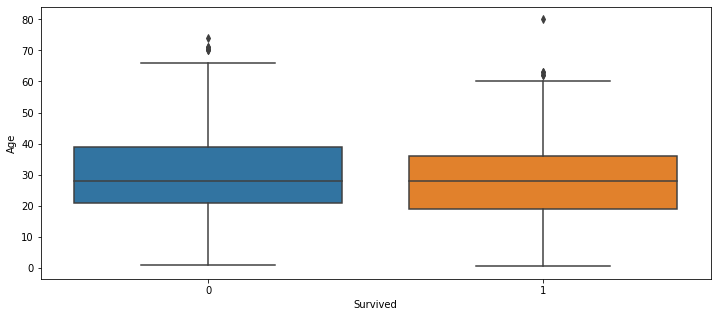

In [20]:
plt.figure(figsize = (12,5)) 
sns.boxplot(titanic['Survived'], titanic['Age']);

# sort out cabins into groups by letter then create dummies

In [21]:
titanic['cabin_letter'] = titanic["Cabin"].astype(str).str[0]

In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_1',
       'cabin_letter'],
      dtype='object')

In [23]:
titanic_dummies = pd.get_dummies(titanic, columns = ['Pclass', 'Sex', 'Embarked','cabin_letter'])

In [24]:
#variable given survived
titanic_dummies.groupby(titanic['Survived']).mean() 


,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_1,Pclass_1,Pclass_2,Pclass_3,...,Embarked_S,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,cabin_letter_n
Survived,,,,,,,,,,,,,,,,,,,,,
0,447.016393,0.0,30.626179,0.553734,0.329690,22.117887,0.415301,0.145719,0.176685,0.677596,...,0.777778,0.014572,0.021858,0.043716,0.014572,0.014572,0.009107,0.003643,0.001821,0.876138
1,444.368421,1.0,28.343690,0.473684,0.464912,48.395408,0.456140,0.397661,0.254386,0.347953,...,0.634503,0.020468,0.102339,0.102339,0.073099,0.070175,0.023392,0.005848,0.000000,0.602339


In [25]:
titanic['cabin_letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [26]:
titanic.groupby('cabin_letter').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_1
cabin_letter,,,,,,,,
A,439.600000,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.133333
B,521.808511,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.361702
C,406.440678,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,0.288136
D,475.939394,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.303030
E,502.437500,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.218750
F,370.384615,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,0.615385
G,216.000000,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,1.000000
T,340.000000,0.000000,1.000000,45.000000,0.000000,0.000000,35.500000,0.000000
n,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325,0.464338


# first model

In [27]:
titanic_dummies.isnull().sum()

PassengerId         0
Survived            0
Name                0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Age_1               0
Pclass_1            0
Pclass_2            0
Pclass_3            0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
cabin_letter_A      0
cabin_letter_B      0
cabin_letter_C      0
cabin_letter_D      0
cabin_letter_E      0
cabin_letter_F      0
cabin_letter_G      0
cabin_letter_T      0
cabin_letter_n      0
dtype: int64

In [28]:
titanic_dummies.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [29]:
titanic_dummies.dropna(inplace = True)

In [30]:
titanic_dummies.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Age_1', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_letter_A',
       'cabin_letter_B', 'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E',
       'cabin_letter_F', 'cabin_letter_G', 'cabin_letter_T', 'cabin_letter_n'],
      dtype='object')

In [31]:
y = titanic_dummies['Survived']
X = titanic_dummies[['Age','SibSp','Parch','Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S','cabin_letter_B', 'cabin_letter_C', 
        'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G', 
        'cabin_letter_T','cabin_letter_n']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10)



In [32]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [34]:
pipe.score(X_train, y_train),pipe.score(X_test, y_test)

(0.8093457943925234, 0.8156424581005587)

### some Fares are 0 so need to get rid of them to use log of fare in model

In [35]:
titanic_dummies[titanic_dummies["Fare"] == 0] # only 7 with 0 fare

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Age_1,Pclass_1,...,Embarked_S,cabin_letter_A,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,cabin_letter_n
179,180,0,"Leonard, Mr. Lionel",36.0,0,0,LINE,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
263,264,0,"Harrison, Mr. William",40.0,0,0,112059,0.0,0,1,...,1,0,1,0,0,0,0,0,0,0
271,272,1,"Tornquist, Mr. William Henry",25.0,0,0,LINE,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
302,303,0,"Johnson, Mr. William Cahoone Jr",19.0,0,0,LINE,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
597,598,0,"Johnson, Mr. Alfred",49.0,0,0,LINE,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
806,807,0,"Andrews, Mr. Thomas Jr",39.0,0,0,112050,0.0,0,1,...,1,1,0,0,0,0,0,0,0,0
822,823,0,"Reuchlin, Jonkheer. John George",38.0,0,0,19972,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [36]:
titanic_dummies = titanic_dummies[titanic_dummies["Fare"] > 0]

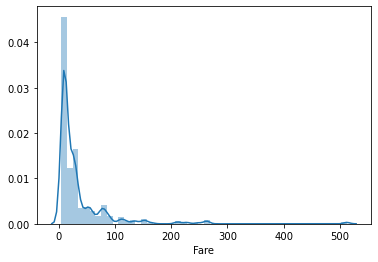

In [37]:
sns.distplot(titanic_dummies["Fare"]);

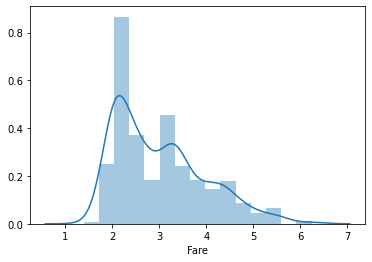

In [39]:
sns.distplot(np.log(titanic_dummies["Fare"]));


# model 2

In [40]:
titanic_dummies["log_fare"] = np.log(titanic_dummies["Fare"])

In [41]:
y = titanic_dummies['Survived']
X = titanic_dummies[['Age','SibSp','Parch','log_fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S','cabin_letter_B', 'cabin_letter_C', 
        'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G', 
        'cabin_letter_T','cabin_letter_n']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10)

In [42]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [43]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8056603773584906, 0.8248587570621468)

### imputing missing age

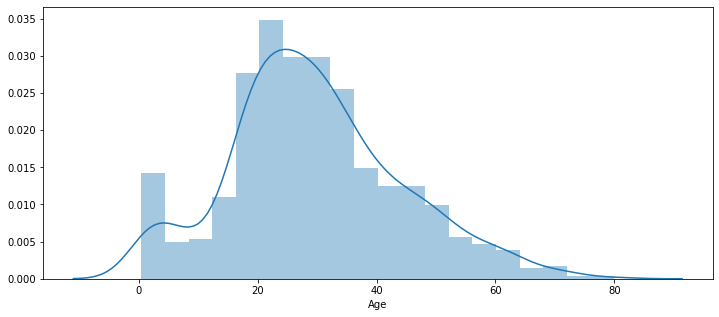

In [45]:
plt.figure(figsize = (12,5)) 
sns.distplot(titanic_dummies["Age"]);

In [50]:
titanic.fillna(-1, inplace = True)

In [56]:
titanic[titanic["Age"] < 30].groupby('Age').mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_1
Age,,,,,,,
-1.00,435.581921,0.293785,2.598870,0.564972,0.180791,22.158567,0
0.42,804.000000,1.000000,3.000000,0.000000,1.000000,8.516700,1
0.67,756.000000,1.000000,2.000000,1.000000,1.000000,14.500000,1
0.75,557.500000,1.000000,3.000000,2.000000,1.000000,19.258300,1
0.83,455.500000,1.000000,2.000000,0.500000,1.500000,23.875000,1
0.92,306.000000,1.000000,1.000000,1.000000,2.000000,151.550000,1
1.00,415.428571,0.714286,2.714286,1.857143,1.571429,30.005957,1
2.00,346.900000,0.300000,2.600000,2.100000,1.300000,37.536250,1
3.00,272.000000,0.833333,2.500000,1.833333,1.333333,25.781950,1


In [57]:
titanic['Age'].mean()

23.600639730639728